# Meta - LLAMA 3.2 (1B)

In [1]:
!pip install transformers peft accelerate bitsandbytes datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from huggingface_hub import login

login(".................")  # Paste your token here


In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=False,
    bnb_4bit_compute_dtype="float16"
)

model_id = "meta-llama/Llama-3.2-1B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

# Inferencing the Model Before Fine Tuning

In [4]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " roti", Cuisine: " Indian", Recipe Time: "40minutes" , Serves: "10 roti", Available Ingredients: [" 2 cup wheat flour, ¼ tsp ajwain, ½ tsp salt, 2 tbsp oil, water, for kneading, ghee, for layers, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""


inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " roti", Cuisine: " Indian", Recipe Time: "40minutes", Serves: "10 roti", Available Ingredients: [" 2 cup wheat flour, ¼ tsp ajwain, ½ tsp salt, 2 tbsp oil, water, for kneading, ghee, for layers, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Here are the ingredients and their quantities: 
Wheat flour: 2 cups
Wheat flour: 1/4 tsp
Wheat flour: 1/4 tsp
Salt: 1/4 tsp
Oil: 2 tbsp
Water: 1/2 cup
Ghee: 1/2 cup
Oil: 1
Oil: 1

The recipe is titled: "Delicious Roti with Spiced Chutney"

**Recipe Title:** "Delicious Roti with Spiced Chutney"

**Servings:** 10 roti

**Cooking Time:** 40 minutes

**Cuisine:** Indian

**Difficulty Level:** Easy

**Serves:** 10 roti

**Ingredients:**

* 2 cups wheat flour
* 1/4 tsp ajwa

In [5]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " cake", Cuisine: " Indian", Recipe Time: "1hourhr10minutes" , Serves: "1 cake", Available Ingredients: ["for mawa / khova (100 gram): 1 tsp butter, ¼ cup milk, ½ cup milk powder", "for cake batter: ½ cup (120 gm) butter, 1 cup (150 gm) powdered sugar, 1½ cup (240 gm) maida / plain flour, 1 tsp baking powder, ¼ tsp baking soda, ¼ cup (60 ml) curd / yogurt, fresh, ¾ cup (190 ml) milk, ¼ tsp cardamom powder, 3 tbsp cashew & almonds, chopped"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " cake", Cuisine: " Indian", Recipe Time: "1hourhr10minutes", Serves: "1 cake", Available Ingredients: ["for mawa / khova (100 gram): 1 tsp butter, ¼ cup milk, ½ cup milk powder", "for cake batter: ½ cup (120 gm) butter, 1 cup (150 gm) powdered sugar, 1½ cup (240 gm) maida / plain flour, 1 tsp baking powder, ¼ tsp baking soda, ¼ cup (60 ml) curd / yogurt, fresh, ¾ cup (190 ml) milk, ¼ tsp cardamom powder, 3 tbsp cashew & almonds, chopped"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details.**

**Recipe: Mawa Cake with Cardamom**

**Preparation Time:** 30 minutes
**Cooking Time:** 1 hour 10 minutes
**Total Time:** 1 hour 40 minutes

**Serves:** 1 cake

**Ingredients:**

* 100 grams for mawa / khova (butter, milk, milk powder)
* 120

In [6]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " chutney, curry", Cuisine: " south indian", Recipe Time: "20minutes" , Serves: "5 Servings", Available Ingredients: [" 3 tbsp besan, ½ cup water, 2 tbsp oil, 1 tsp mustard, ½ tsp chana dal, ½ tsp urad dal, ½ tsp cumin, 2 dried red chilli, few curry leaves, pinch hing, 2 onion, sliced, 1 inch ginger, chopped, 4 chilli, slit, 1 tsp salt, ¼ tsp turmeric, 1 tomato, cubed, 2 tbsp coriander, chopped, 2 tbsp lemon juice"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " chutney, curry", Cuisine: " south indian", Recipe Time: "20minutes", Serves: "5 Servings", Available Ingredients: [" 3 tbsp besan, ½ cup water, 2 tbsp oil, 1 tsp mustard, ½ tsp chana dal, ½ tsp urad dal, ½ tsp cumin, 2 dried red chilli, few curry leaves, pinch hing, 2 onion, sliced, 1 inch ginger, chopped, 4 chilli, slit, 1 tsp salt, ¼ tsp turmeric, 1 tomato, cubed, 2 tbsp coriander, chopped, 2 tbsp lemon juice"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Today, we will make a delicious and spicy South Indian Chutney to serve with your favorite curry dishes. Here are the ingredients you will need: 

**Chutney Recipe:**

**Servings:** 5
**Time:** 20 minutes
**Cuisine:** South Indian

**Ingredients:**

* 3 tbsp besan
* 1/

In [7]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Dessert", Cuisine: " mangalore, Recipe Time: "3minutes" , Serves: "1 Serving", Available Ingredients: [" 1 scoop vanilla ice cream, 1 tbsp grapes, chopped, 1 tbsp mango, chopped, 1 tbsp apple, chopped, 1 scoop strawberry ice cream, 1 tbsp strawberry jelly, 2 tbsp nuts, cashew, almonds, pistachios, 1 tbsp tutti frutti, 1 scoop mango ice cream, 1 cherry"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""


inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Dessert", Cuisine: " mangalore, Recipe Time: "3minutes", Serves: "1 Serving", Available Ingredients: [" 1 scoop vanilla ice cream, 1 tbsp grapes, chopped, 1 tbsp mango, chopped, 1 tbsp apple, chopped, 1 scoop strawberry ice cream, 1 tbsp strawberry jelly, 2 tbsp nuts, cashew, almonds, pistachios, 1 tbsp tutti frutti, 1 scoop mango ice cream, 1 cherry"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Here is the recipe:

**Mangalore Mango Delight**

A delicious dessert featuring the sweetest ingredients in the given list. This recipe combines flavors of mango, strawberry, and vanilla ice cream to create a unique and indulgent treat.

**Ingredients:**

* 1 scoop vanilla ice cream
* 1 tbsp grapes
* 1 tbsp mango
* 1 tbsp apple
*

In [8]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Breakfast", Cuisine: " south india", Recipe Time: "20minutes" , Serves: "20 dosa", Available Ingredients: [" 1.5 cup besan / gram flour, ¼ cup rava / semolina / suji, coarse, ¼ cup rice flour, fine, ½ tsp ajwain, ¼ tsp turmeric, ½ tsp chilli powder, ¾ tsp salt, water, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Breakfast", Cuisine: " south india", Recipe Time: "20minutes", Serves: "20 dosa", Available Ingredients: [" 1.5 cup besan / gram flour, ¼ cup rava / semolina / suji, coarse, ¼ cup rice flour, fine, ½ tsp ajwain, ¼ tsp turmeric, ½ tsp chilli powder, ¾ tsp salt, water, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Here is the ingredients list: besan / gram flour, rava / semolina / suji, coarse, rice flour, fine, ajwain, turmeric, chilli powder, salt, water, oil, for roasting

**Breakfast South India Dosa Recipe**

**Servings:** 20 Dosa

**Prep Time:** 20 minutes
**Cook Time:** 20 minutes
**Total Time:** 40 minutes

**Step 1: Prepare the Dosa Batter**

* Rinse the besan / gram flour, rava / semolina / suji

In [9]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " snacks", Cuisine: " indian street food", Recipe Time: "40minutes" , Serves: "5 Servings", Available Ingredients: ["for pressure cooking: 2 tbsp butter, 2 tbsp oil, 1 tsp cumin, 1 onion, finely chopped, 1 tsp ginger garlic paste, ¼ tsp turmeric, 1 tsp chilli powder, 2 tbsp pav bhaji masala, 2 tbsp coriander, finely chopped, 2 tomato, finely chopped, 1 carrot, chopped, 10 florets cauliflower, 3 tbsp peas, ½ capsicum, finely chopped, ½ beetroot, chopped, 2 potato, chopped, 1½ cup water, 1 tsp salt", "for tadka: 2 tsp oil, 1 tbsp butter, 1 tsp kasuri methi, 2 tbsp coriander, finely chopped, ¼ tsp pav bhaji masala", "for roasting pav: ½ tsp butter, ¼ tsp pav bhaji masala, 1 tbsp coriander, pav"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " snacks", Cuisine: " indian street food", Recipe Time: "40minutes", Serves: "5 Servings", Available Ingredients: ["for pressure cooking: 2 tbsp butter, 2 tbsp oil, 1 tsp cumin, 1 onion, finely chopped, 1 tsp ginger garlic paste, ¼ tsp turmeric, 1 tsp chilli powder, 2 tbsp pav bhaji masala, 2 tbsp coriander, finely chopped, 2 tomato, finely chopped, 1 carrot, chopped, 10 florets cauliflower, 3 tbsp peas, ½ capsicum, finely chopped, ½ beetroot, chopped, 2 potato, chopped, 1½ cup water, 1 tsp salt", "for tadka: 2 tsp oil, 1 tbsp butter, 1 tsp kasuri methi, 2 tbsp coriander, finely chopped, ¼ tsp pav bhaji masala", "for roasting pav: ½ tsp butter, ¼ tsp pav bhaji masala, 1 tbsp coriander, pav"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provi

In [10]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Snack", Cuisine: " indian street food", Recipe Time: "30minutes" , Serves: "7 Servings", Available Ingredients: [" 2 slice bread, white or brown, 1 potato, boiled & mashed, ½ cup paneer, grated, ½ tsp chilli powder, ½ tsp turmeric, ½ tsp cumin powder, ½ tsp garam masala, 1 tsp aamchur, ½ tsp salt, 2 tbsp corn flour, ½ onion, finely chopped, 2 tbsp coriander, chopped, 2 chilli, finely chopped, breadcrumbs, for coating, oil, for frying"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Snack", Cuisine: " indian street food", Recipe Time: "30minutes", Serves: "7 Servings", Available Ingredients: [" 2 slice bread, white or brown, 1 potato, boiled & mashed, ½ cup paneer, grated, ½ tsp chilli powder, ½ tsp turmeric, ½ tsp cumin powder, ½ tsp garam masala, 1 tsp aamchur, ½ tsp salt, 2 tbsp corn flour, ½ onion, finely chopped, 2 tbsp coriander, chopped, 2 chilli, finely chopped, breadcrumbs, for coating, oil, for frying"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Here are the ingredients:

*   1 ½ cups cooked potato, mashed
*   1 ½ cups paneer, grated
*   1 ½ cups aamchur, chopped
*   1 ½ cups breadcrumbs, for coating
*   1 tsp chilli powder
*   1 tsp coriander
*   1 tsp salt
*   2 ½ cups corn flour
*   2 

In [11]:
prompt = """ou are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " pulao", Cuisine: " north indian", Recipe Time: "30minutes" , Serves: "2 Servings", Available Ingredients: [" 2 tbsp oil, 2 bay leaf, 3 pods cardamom, 4 cloves, 1 inch cinnamon, ½ tsp pepper, 1 tsp cumin / jeera, 1 onion, sliced, 1 tsp ginger garlic paste, 1 chilli, slit, 2 tbsp mint / pudina, finely chopped, 2 tbsp coriander, finely chopped, 1 tomato, finely chopped, ½ tsp turmeric, 1 tsp kashmiri red chilli powder, ½ tsp cumin powder, ½ tsp coriander powder, ½ tsp garam masala, 2 potato / aloo, cubed, ½ cup peas / matar, 2 cup water, 1 tsp salt, 1 cup basmati rice"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


ou are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " pulao", Cuisine: " north indian", Recipe Time: "30minutes", Serves: "2 Servings", Available Ingredients: [" 2 tbsp oil, 2 bay leaf, 3 pods cardamom, 4 cloves, 1 inch cinnamon, ½ tsp pepper, 1 tsp cumin / jeera, 1 onion, sliced, 1 tsp ginger garlic paste, 1 chilli, slit, 2 tbsp mint / pudina, finely chopped, 2 tbsp coriander, finely chopped, 1 tomato, finely chopped, ½ tsp turmeric, 1 tsp kashmiri red chilli powder, ½ tsp cumin powder, ½ tsp coriander powder, ½ tsp garam masala, 2 potato / aloo, cubed, ½ cup peas / matar, 2 cup water, 1 tsp salt, 1 cup basmati rice"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Please make sure to include all the necessary ingredients, and ensure the recipe is creative, clear, and easy to f

In [12]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " sandwich", Cuisine: " indian street food", Recipe Time: "20minutes" , Serves: "4 Servings", Available Ingredients: ["for chilli garlic butter: 2 tbsp butter, 3 chilli, finely chopped, 5 garlic, finely chopped, ½ tsp mixed herbs, 2 tbsp coriander, finely chopped", "for sandwich & toast: bread, chilli flakes, cheese, tomato, onion, cucumber"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " sandwich", Cuisine: " indian street food", Recipe Time: "20minutes", Serves: "4 Servings", Available Ingredients: ["for chilli garlic butter: 2 tbsp butter, 3 chilli, finely chopped, 5 garlic, finely chopped, ½ tsp mixed herbs, 2 tbsp coriander, finely chopped", "for sandwich & toast: bread, chilli flakes, cheese, tomato, onion, cucumber"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Here is the recipe:

**Chilli Garlic Butter Sandwiches & Toasts**

**Servings:** 4

**Prep Time:** 20 minutes

**Cook Time:** 20 minutes

**Total Time:** 40 minutes

**Recipe:**

**Chilli Garlic Butter Sandwiches & Toasts**

**Ingredients:**

* 2 tbsp butter
* 3 chillies, finely chopped
* 5 garlic, finely chopped
* ½ tsp mixed herbs
* 2 tbsp 

In [13]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Side Dish", Cuisine: " north indian", Recipe Time: "20minutes" , Serves: "4 Servings", Available Ingredients: [" 3 tsp oil, 1 tsp jeea / cumin, 1 tsp kasuri methi / dry fenugreek leaves, 1 onion, finely chopped, ½ tsp ginger garlic paste, 1 tomato, finely chopped, 1 potato / aloo, finely chopped, ¼ tsp turmeric / haldi, ½ tsp kashmiri red chilli powder / lal mirch powder, 1 tsp coriander powder, ¾ tsp salt, 4 cup cabbage, shredded, ½ cup peas / matar, ¼ tsp garam masala, 2 tbsp coriander leaves, finely chopped"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Side Dish", Cuisine: " north indian", Recipe Time: "20minutes", Serves: "4 Servings", Available Ingredients: [" 3 tsp oil, 1 tsp jeea / cumin, 1 tsp kasuri methi / dry fenugreek leaves, 1 onion, finely chopped, ½ tsp ginger garlic paste, 1 tomato, finely chopped, 1 potato / aloo, finely chopped, ¼ tsp turmeric / haldi, ½ tsp kashmiri red chilli powder / lal mirch powder, 1 tsp coriander powder, ¾ tsp salt, 4 cup cabbage, shredded, ½ cup peas / matar, ¼ tsp garam masala, 2 tbsp coriander leaves, finely chopped"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. The final dish should be a creative and flavorful dish that showcases the ingredient used in each recipe. Serves 4 and can be easily adjusted for a larger or smaller gro

# Model Training

In [14]:
from datasets import load_dataset

# Load your dataset from Hugging Face (replace 'Karthik15/UltimateRecipeData' with the exact name of your dataset)
dataset = load_dataset('Karthik15/UltimateRecipeData')

# Display the dataset's structure
print(dataset)


cleaned_foood_dataset%20%281%29.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

cleaned_foood_dataset2%20%281%29.json:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

cleaned_foood_dataset3%20%281%29.json:   0%|          | 0.00/823k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2627 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2627
    })
})


In [15]:
tokenizer.pad_token = tokenizer.eos_token

# Tokenization function
def tokenize_function(example):
    # Format prompt + response in a single sequence
    full_text = f"### Instruction:\n{example['text']}\n\n### Response:\n{example['label']}"
    tokenized = tokenizer(full_text, padding="max_length", truncation=True, max_length=512)

    # Set labels and mask padding tokens in labels
    tokenized["labels"] = [
        (token if token != tokenizer.pad_token_id else -100)
        for token in tokenized["input_ids"]
    ]

    return tokenized

# Preprocess the dataset
def preprocess_data(dataset):
    tokenized_datasets = dataset.map(tokenize_function, batched=False)

    # Remove original text fields
    tokenized_datasets = tokenized_datasets.remove_columns(["text", "label"])

    # Format for PyTorch
    tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

    return tokenized_datasets

# Apply preprocessing
tokenized_datasets = preprocess_data(dataset)

# Check a sample
print(tokenized_datasets["train"][0])


Map:   0%|          | 0/2627 [00:00<?, ? examples/s]

{'input_ids': tensor([128000,  14711,  30151,    512,   2675,    527,    459,   6335,  30806,
            13,   4718,   3465,    374,    311,   7068,   5016,    323,  11775,
         19141,    430,   3449,   3230,  13186,     13,   5560,   1193,    279,
         14293,   3984,     11,    323,   6106,    279,  11363,    374,  11782,
            11,   2867,     11,    323,   4228,    311,   1833,     13,  17026,
            25,    330,   5868,     72,    498,  81961,     25,    330,   7904,
           498,  26371,   4212,     25,    220,    330,   1272,  38137,      1,
          1174,    328,  13583,     25,    330,    605,   5868,     72,    498,
         16528,  52275,     25,   4482,    220,     17,  10747,  34153,  20415,
            11,    220,  42973,  39020,  26514,     86,    467,     11,    220,
         27154,  39020,  12290,     11,    220,     17,  64975,   5707,     11,
          3090,     11,    369,  14174,   2277,     11,    342,  50153,     11,
           369,  13931,   

In [16]:
train_dataset_split = tokenized_datasets['train'].train_test_split(test_size=0.1)  # 10% for eval set



In [17]:
train_dataset = train_dataset_split['train']  # Training data
eval_dataset = train_dataset_split['test']   # Evaluation (validation) data


In [18]:
print(train_dataset)
print(eval_dataset)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2364
})
Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 263
})


In [19]:
from peft import get_peft_model, LoraConfig, TaskType

peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q_proj", "v_proj"]
)

model = get_peft_model(model, peft_config)


In [20]:
model.print_trainable_parameters()


trainable params: 1,703,936 || all params: 1,237,518,336 || trainable%: 0.1377


In [21]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',  # where to save results
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    logging_dir='./logs',
    logging_steps=10,
    save_steps=10,
    eval_steps=10,
    report_to=[]  # Disable reporting to avoid WandB
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Replace with your training dataset
    eval_dataset=eval_dataset,    # Replace with your evaluation dataset
    tokenizer=tokenizer,
)

# Train and evaluate after unfreezing LoRA layers
trainer.train()
trainer.evaluate()

<ipython-input-21-6bd8cfa7154d>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
10,2.507100
20,2.390400
30,2.228300
40,2.102400
50,1.938400
60,1.772600
70,1.672200
80,1.548000
90,1.454400
100,1.414600


KeyboardInterrupt: 

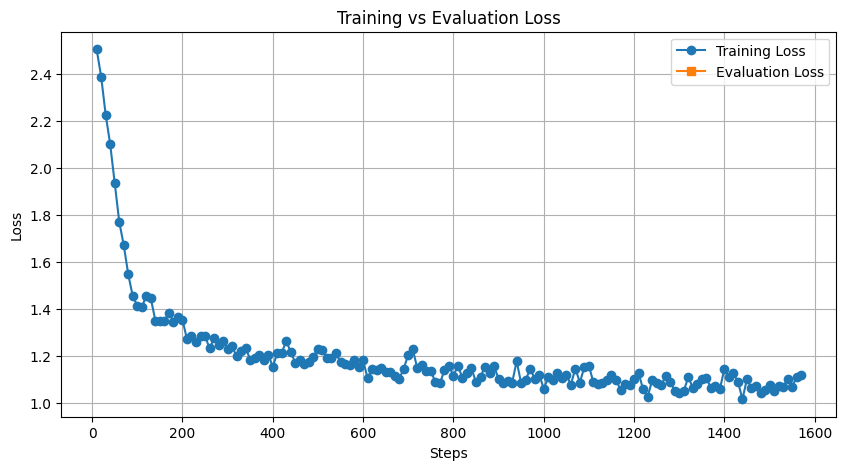

In [22]:
import matplotlib.pyplot as plt
from transformers import Trainer

# Assuming `trainer` is your Hugging Face Trainer object
log_history = trainer.state.log_history

# Extract losses
train_loss = [log["loss"] for log in log_history if "loss" in log]
eval_loss = [log["eval_loss"] for log in log_history if "eval_loss" in log]
steps_train = [log["step"] for log in log_history if "loss" in log]
steps_eval = [log["step"] for log in log_history if "eval_loss" in log]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps_train, train_loss, label="Training Loss", marker='o')
plt.plot(steps_eval, eval_loss, label="Evaluation Loss", marker='s')
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training vs Evaluation Loss")
plt.legend()
plt.grid(True)
plt.show()


# Inferencing the Model after Fine Tuning

In [23]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " roti", Cuisine: " Indian", Recipe Time: "40minutes" , Serves: "10 roti", Available Ingredients: [" 2 cup wheat flour, ¼ tsp ajwain, ½ tsp salt, 2 tbsp oil, water, for kneading, ghee, for layers, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""


inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " roti", Cuisine: " Indian", Recipe Time: "40minutes", Serves: "10 roti", Available Ingredients: [" 2 cup wheat flour, ¼ tsp ajwain, ½ tsp salt, 2 tbsp oil, water, for kneading, ghee, for layers, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Provide all the necessary ingredients and instructions in a clear and concise manner. Recipe: 

Recipe: "roti recipe using wheat flour", Instructions: "knead the dough to a smooth and pliable dough, add salt and ajwain and knead well, shape into a ball, cover and rest for 10 minutes, roll to a thickness of 2 inches, cut into 10 pieces, brush with oil, roll into a ball, and roll into a thin sheet, brush with oil, cut into 2 inch pieces, and roll into a roti", "fry in h

In [24]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " cake", Cuisine: " Indian", Recipe Time: "1hourhr10minutes" , Serves: "1 cake", Available Ingredients: ["for mawa / khova (100 gram): 1 tsp butter, ¼ cup milk, ½ cup milk powder", "for cake batter: ½ cup (120 gm) butter, 1 cup (150 gm) powdered sugar, 1½ cup (240 gm) maida / plain flour, 1 tsp baking powder, ¼ tsp baking soda, ¼ cup (60 ml) curd / yogurt, fresh, ¾ cup (190 ml) milk, ¼ tsp cardamom powder, 3 tbsp cashew & almonds, chopped"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " cake", Cuisine: " Indian", Recipe Time: "1hourhr10minutes", Serves: "1 cake", Available Ingredients: ["for mawa / khova (100 gram): 1 tsp butter, ¼ cup milk, ½ cup milk powder", "for cake batter: ½ cup (120 gm) butter, 1 cup (150 gm) powdered sugar, 1½ cup (240 gm) maida / plain flour, 1 tsp baking powder, ¼ tsp baking soda, ¼ cup (60 ml) curd / yogurt, fresh, ¾ cup (190 ml) milk, ¼ tsp cardamom powder, 3 tbsp cashew & almonds, chopped"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Recipe:
Step 1: Preheat the oven to 180 degree celsius (350 fahrenheit). Grease a 10-inch round cake pan and line the bottom with parchment paper.
Step 2: Mix butter and milk in a bowl and stir well. Keep aside. Add milk powder and mix well. St

In [25]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " chutney, curry", Cuisine: " south indian", Recipe Time: "20minutes" , Serves: "5 Servings", Available Ingredients: [" 3 tbsp besan, ½ cup water, 2 tbsp oil, 1 tsp mustard, ½ tsp chana dal, ½ tsp urad dal, ½ tsp cumin, 2 dried red chilli, few curry leaves, pinch hing, 2 onion, sliced, 1 inch ginger, chopped, 4 chilli, slit, 1 tsp salt, ¼ tsp turmeric, 1 tomato, cubed, 2 tbsp coriander, chopped, 2 tbsp lemon juice"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " chutney, curry", Cuisine: " south indian", Recipe Time: "20minutes", Serves: "5 Servings", Available Ingredients: [" 3 tbsp besan, ½ cup water, 2 tbsp oil, 1 tsp mustard, ½ tsp chana dal, ½ tsp urad dal, ½ tsp cumin, 2 dried red chilli, few curry leaves, pinch hing, 2 onion, sliced, 1 inch ginger, chopped, 4 chilli, slit, 1 tsp salt, ¼ tsp turmeric, 1 tomato, cubed, 2 tbsp coriander, chopped, 2 tbsp lemon juice"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Recipe Explanation: "To make the curry, heat oil in a pan and sauté 1 tsp mustard, ½ tsp chana dal, ½ tsp urad dal, ½ tsp cumin and 2 dried red chilli, for flavor" "Add in 2 tbsp oil, 1 onion, 1 inch ginger, 4 chilli and saute until onion turns golden brown" "Add in 1 

In [26]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Dessert", Cuisine: " mangalore, Recipe Time: "3minutes" , Serves: "1 Serving", Available Ingredients: [" 1 scoop vanilla ice cream, 1 tbsp grapes, chopped, 1 tbsp mango, chopped, 1 tbsp apple, chopped, 1 scoop strawberry ice cream, 1 tbsp strawberry jelly, 2 tbsp nuts, cashew, almonds, pistachios, 1 tbsp tutti frutti, 1 scoop mango ice cream, 1 cherry"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""


inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Dessert", Cuisine: " mangalore, Recipe Time: "3minutes", Serves: "1 Serving", Available Ingredients: [" 1 scoop vanilla ice cream, 1 tbsp grapes, chopped, 1 tbsp mango, chopped, 1 tbsp apple, chopped, 1 scoop strawberry ice cream, 1 tbsp strawberry jelly, 2 tbsp nuts, cashew, almonds, pistachios, 1 tbsp tutti frutti, 1 scoop mango ice cream, 1 cherry"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. I am the expert chef, not a chef! Please generate a new recipe. Thanks! Recipe: "cherry ice cream with fruits", "Recipe Time: 3 minutes", "Ingredients: 1 scoop vanilla ice cream, 1 tbsp grapes, 1 tbsp mango, 1 tbsp apple, 1 tbsp strawberry ice cream, 1 tbsp strawberry jelly, 2 tbsp nuts, cashew, almonds, pistachios, 1 tbsp tutti 

In [27]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Breakfast", Cuisine: " south india", Recipe Time: "20minutes" , Serves: "20 dosa", Available Ingredients: [" 1.5 cup besan / gram flour, ¼ cup rava / semolina / suji, coarse, ¼ cup rice flour, fine, ½ tsp ajwain, ¼ tsp turmeric, ½ tsp chilli powder, ¾ tsp salt, water, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Breakfast", Cuisine: " south india", Recipe Time: "20minutes", Serves: "20 dosa", Available Ingredients: [" 1.5 cup besan / gram flour, ¼ cup rava / semolina / suji, coarse, ¼ cup rice flour, fine, ½ tsp ajwain, ¼ tsp turmeric, ½ tsp chilli powder, ¾ tsp salt, water, oil, for roasting"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Recipe: 
Remove the skin from 1 cup besan, dry roast 1 cup rava, dry roast ¼ cup rice flour, fine and grind to a coarse powder. Mix ¼ tsp ajwain, ¼ tsp chilli powder and ½ tsp salt. Add the prepared besan-rava mixture, ¼ cup water and mix well. Add oil and mix well. Keep on roasting in the flame until the dosa forms a thick batter. Remove from flame and make the dosa using the dosa pan or a non-

In [28]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " snacks", Cuisine: " indian street food", Recipe Time: "40minutes" , Serves: "5 Servings", Available Ingredients: ["for pressure cooking: 2 tbsp butter, 2 tbsp oil, 1 tsp cumin, 1 onion, finely chopped, 1 tsp ginger garlic paste, ¼ tsp turmeric, 1 tsp chilli powder, 2 tbsp pav bhaji masala, 2 tbsp coriander, finely chopped, 2 tomato, finely chopped, 1 carrot, chopped, 10 florets cauliflower, 3 tbsp peas, ½ capsicum, finely chopped, ½ beetroot, chopped, 2 potato, chopped, 1½ cup water, 1 tsp salt", "for tadka: 2 tsp oil, 1 tbsp butter, 1 tsp kasuri methi, 2 tbsp coriander, finely chopped, ¼ tsp pav bhaji masala", "for roasting pav: ½ tsp butter, ¼ tsp pav bhaji masala, 1 tbsp coriander, pav"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " snacks", Cuisine: " indian street food", Recipe Time: "40minutes", Serves: "5 Servings", Available Ingredients: ["for pressure cooking: 2 tbsp butter, 2 tbsp oil, 1 tsp cumin, 1 onion, finely chopped, 1 tsp ginger garlic paste, ¼ tsp turmeric, 1 tsp chilli powder, 2 tbsp pav bhaji masala, 2 tbsp coriander, finely chopped, 2 tomato, finely chopped, 1 carrot, chopped, 10 florets cauliflower, 3 tbsp peas, ½ capsicum, finely chopped, ½ beetroot, chopped, 2 potato, chopped, 1½ cup water, 1 tsp salt", "for tadka: 2 tsp oil, 1 tbsp butter, 1 tsp kasuri methi, 2 tbsp coriander, finely chopped, ¼ tsp pav bhaji masala", "for roasting pav: ½ tsp butter, ¼ tsp pav bhaji masala, 1 tbsp coriander, pav"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provi

In [29]:
prompt = """You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Snack", Cuisine: " indian street food", Recipe Time: "30minutes" , Serves: "7 Servings", Available Ingredients: [" 2 slice bread, white or brown, 1 potato, boiled & mashed, ½ cup paneer, grated, ½ tsp chilli powder, ½ tsp turmeric, ½ tsp cumin powder, ½ tsp garam masala, 1 tsp aamchur, ½ tsp salt, 2 tbsp corn flour, ½ onion, finely chopped, 2 tbsp coriander, chopped, 2 chilli, finely chopped, breadcrumbs, for coating, oil, for frying"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details."""
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You are an expert chef. Your task is to generate unique and novel recipes that meet specific criteria. Use only the ingredients provided, and ensure the recipe is creative, clear, and easy to follow. Course: " Snack", Cuisine: " indian street food", Recipe Time: "30minutes", Serves: "7 Servings", Available Ingredients: [" 2 slice bread, white or brown, 1 potato, boiled & mashed, ½ cup paneer, grated, ½ tsp chilli powder, ½ tsp turmeric, ½ tsp cumin powder, ½ tsp garam masala, 1 tsp aamchur, ½ tsp salt, 2 tbsp corn flour, ½ onion, finely chopped, 2 tbsp coriander, chopped, 2 chilli, finely chopped, breadcrumbs, for coating, oil, for frying"], Instructions: Provide a step-by-step recipe in short, clear sentences based on above provided details. Recipe Explanation: "To make a crispy coated potato snack, start by soaking bread in water for 30 minutes. Drain the water and pat the bread slice to remove excess moisture", "Combine potato, paneer, chilli powder, turmeric, cumin powder, garam ma

In [ ]:
from peft import PeftModel

# Save the LoRA adapter
model.save_pretrained("lora_llama_model")
tokenizer.save_pretrained("lora_llama_model")


('lora_llama_model/tokenizer_config.json',
 'lora_llama_model/special_tokens_map.json',
 'lora_llama_model/tokenizer.json')